In [1]:
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.10.1
numpy: 1.24.2
matplotlib: 3.7.1
pandas: 1.5.3
statsmodels: 0.13.5
sklearn: 1.2.2


In [ ]:
from pandas import read_csv

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze= True)
#print(type(series))
#print(series.head())
#print(series.size)
print(series['1959-01'])

In [81]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze= True)
temps = DataFrame(series.values)
temps1 = temps.shift(-1)
print(temps , temps1)
"""
dataframe = concat([temps.shift(1), temps], axis=1)
print(dataframe)
dataframe.columns = ['t-1', 't']
#print(dataframe.head(5))
"""

      0
0    35
1    32
2    30
3    31
4    44
..   ..
360  37
361  52
362  48
363  55
364  50

[365 rows x 1 columns]         0
0    32.0
1    30.0
2    31.0
3    44.0
4    29.0
..    ...
360  52.0
361  48.0
362  55.0
363  50.0
364   NaN

[365 rows x 1 columns]


C:\Users\lan-27600\AppData\Local\Temp\ipykernel_15380\192619164.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze= True)


"\ndataframe = concat([temps.shift(1), temps], axis=1)\nprint(dataframe)\ndataframe.columns = ['t-1', 't']\n#print(dataframe.head(5))\n"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

import talib
import pandas as pd
import numpy as np
import yfinance

dfo = yfinance.download(tickers="ada-usd", start="2022-01-01", end="2023-12-01", interval= "1d")
dfo['RSI'] = talib.RSI(dfo['Close'], 15)
dfo = dfo[15:]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(dfo))
df.columns = dfo.columns

Data_X = df[['Open', 'High', 'Low', 'RSI']] 
Data_y = df[['Close']]

X_train, X_test, y_train, y_test = train_test_split(
         Data_X, Data_y, test_size=0.33, shuffle=False)


DtreeR = DecisionTreeRegressor()
DtreeR.fit(X_train, y_train)

predicted = DtreeR.predict(X_test)

y_true = y_test
y_pred = predicted

mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
mse

res = pd.DataFrame()

res['True'] = y_true
res['Pred'] = y_pred

res.plot()

[*********************100%***********************]  1 of 1 completed


f:\python\Crypto_Processing_Backtest\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

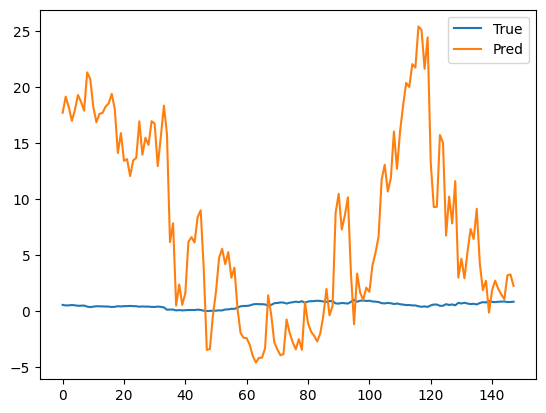

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

import talib
import pandas as pd
import numpy as np
import yfinance

dfo = yfinance.download(tickers="ada-usd", start="2022-01-01", end="2023-12-01", interval= "1d")
dfo['RSI'] = talib.RSI(dfo['Close'], 15)
dfo = dfo[15:]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(dfo))
df.columns = dfo.columns

Data_X = df[['Open', 'High', 'Low', 'RSI']] 
Data_y = df[['Close']]

X_train, X_test, y_train, y_test = train_test_split(
         Data_X, Data_y, test_size=0.33, shuffle=False)


DtreeR = SVR(kernel='sigmoid') # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
DtreeR.fit(X_train, y_train)

predicted = DtreeR.predict(X_test)

y_true = y_test
y_pred = predicted

mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
mse

res = pd.DataFrame()

y_truee = pd.DataFrame(scaler.fit_transform(y_true)) #y_true
y_truee.columns = y_true.columns
res['True'] = y_truee
res['Pred'] = y_pred

res.plot()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
mse:  0.003937229164019051


f:\python\Crypto_Processing_Backtest\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='Date'>

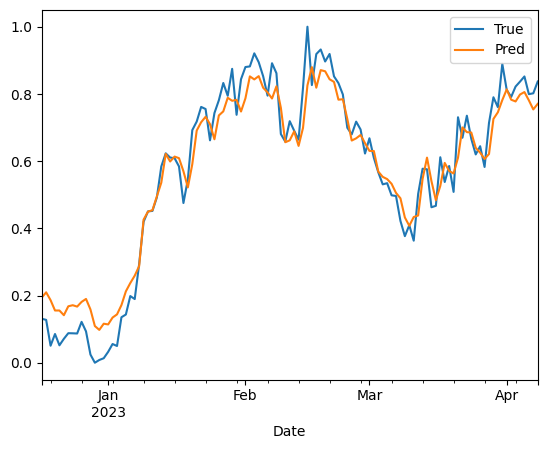

In [69]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

import talib
import pandas as pd
import numpy as np
import yfinance

dfo = yfinance.download(tickers="ada-usd", start="2018-01-01", end="2023-12-01", interval= "1d")
dfo['RSI'] = talib.RSI(dfo['Close'], 15)
dfo = dfo[15:]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(dfo))
df.columns = dfo.columns
df.index =dfo.index

Data_X = df[['Open', 'High', 'Low','RSI']] # 'Open', 'High', 'Low', 
Data_y = df[['Close']]



# ---------------------------------------------
dft = yfinance.download(tickers="ada-usd", start="2022-12-02", end="2023-12-01", interval= "1d")
dft['RSI'] = talib.RSI(dft['Close'], 15)
dft = dft[15:]

scaler = MinMaxScaler()
dfts = pd.DataFrame(scaler.fit_transform(dft))
dfts.columns = dft.columns
dfts.index =dft.index

Data_XX = dfts[['Open', 'High', 'Low', 'RSI']] # 'Open', 'High', 'Low', 
Data_yy = dfts[['Close']]



# ----------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
         Data_X, Data_y, test_size=0.33, shuffle=False)


DtreeR = SVR(kernel='linear') # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
DtreeR.fit(X_train, y_train)

predicted = DtreeR.predict(Data_XX)

y_true = Data_yy
y_pred = predicted

mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
print("mse: ", mse)

res = pd.DataFrame()

res['True'] = Data_yy
res['Pred'] = y_pred

res.plot()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
mse:  0.004967628100289635


<Axes: xlabel='Date'>

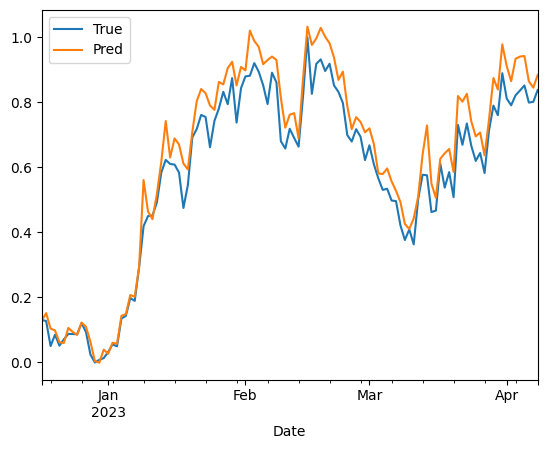

In [75]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

import talib
import pandas as pd
import numpy as np
import yfinance

dfo = yfinance.download(tickers="ada-usd", start="2018-01-01", end="2023-12-01", interval= "1d")
dfo['RSI'] = talib.RSI(dfo['Close'], 15)
dfo = dfo[15:]

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(dfo))
df.columns = dfo.columns
df.index =dfo.index

Data_X = df[['Open', 'High', 'Low','RSI']] # 'Open', 'High', 'Low', 
Data_y = df[['Close']]




# ---------------------------------------------
dft = yfinance.download(tickers="ada-usd", start="2022-12-02", end="2023-12-01", interval= "1d")
dft['RSI'] = talib.RSI(dft['Close'], 15)
dft = dft[15:]

scaler = MinMaxScaler()
dfts = pd.DataFrame(scaler.fit_transform(dft))
dfts.columns = dft.columns
dfts.index =dft.index

Data_XX = dfts[['Open', 'High', 'Low', 'RSI']] # 'Open', 'High', 'Low', 
Data_yy = dfts[['Close']]



# ----------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
         Data_X, Data_y, test_size=0.33, shuffle=False)


DtreeR = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)) # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
DtreeR.fit(X_train, y_train)

predicted = DtreeR.predict(Data_XX)

y_true = Data_yy
y_pred = predicted

mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
print("mse: ", mse)

res = pd.DataFrame()

res['True'] = Data_yy
res['Pred'] = y_pred

res.plot()
